In [7]:
import os
import pandas as pd
from sqlalchemy import create_engine

db_url = os.environ['DATABASE_URL']
df = pd.read_sql_query('SELECT * FROM headlines;', create_engine(db_url), index_col='index')

In [8]:
df.shape

(426, 4)

In [9]:
df.head()

,headline,url,pub,timestamp
index,,,,
0,"As China Plans Big Concessions on Trade, Some ...",https://www.nytimes.com/2018/05/17/us/politics...,nyt,20180517T1903
1,"China, Signaling Thaw With U.S. Over Trade, Ap...",https://www.nytimes.com/2018/05/17/business/de...,nyt,20180517T1903
2,Qatar-Linked Firm Nears Deal to Bail Out Kushn...,https://www.nytimes.com/2018/05/17/nyregion/ku...,nyt,20180517T1903
3,"Filing Shows Trump Paid Cohen, Who Paid Stormy...",https://www.nytimes.com/2018/05/16/us/politics...,nyt,20180517T1903
4,"Trump Rants, Calling Some Unauthorized Immigra...",https://www.nytimes.com/2018/05/16/us/politics...,nyt,20180517T1903


In [10]:
df.loc[df['headline'] == df['headline'].value_counts().head(1).index.values[0]]

,headline,url,pub,timestamp
index,,,,
4,"White House: If North Korea wants to meet, we'...",http://video.foxnews.com/v/5786203682001/,fox,20180517T1903
67,"White House: If North Korea wants to meet, we'...",//video.foxnews.com/v/5786203682001/?playlist_...,fox,20180517T1903
160,"White House: If North Korea wants to meet, we'...",//video.foxnews.com/v/5786203682001/,fox,20180517T1903


In [234]:
headlines = df[['headline', 'pub']].drop_duplicates()
headlines.index = range(len(headlines))
headlines.head()

,headline,pub
0,"As China Plans Big Concessions on Trade, Some ...",nyt
1,"China, Signaling Thaw With U.S. Over Trade, Ap...",nyt
2,Qatar-Linked Firm Nears Deal to Bail Out Kushn...,nyt
3,"Filing Shows Trump Paid Cohen, Who Paid Stormy...",nyt
4,"Trump Rants, Calling Some Unauthorized Immigra...",nyt


In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer
#       if stemming == 'snowball':
#             self.stemmer = _nltk.stem.snowball.EnglishStemmer()
#         elif stemming == 'lancaster':
#             self.stemmer = _nltk.stem.lancaster.LancasterStemmer()
#         elif stemming == 'wordnet':
#             self.stemmer = _nltk.stem.wordnetWordNetLemmatizer()

analyzer = CountVectorizer(stop_words='english', ngram_range=(1,3)).build_analyzer()
stemmer = LancasterStemmer()

def stem_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

vect = CountVectorizer(
    stop_words='english',
    analyzer=stem_words
)
td = vect.fit_transform(headlines['headline'])
td = pd.DataFrame(td.toarray(), columns=vect.get_feature_names(), index=headlines.index)
td.head()

,000,000 feet,000 feet sky,000 feet worst,000 homes,000 homes missouri,000 workers,07,07 pm,07 pm et,...,young educated,young educated workers,youth venezuela,youth venezuela amid,youtub,youtube launches,youtube launches new,zuckerberg,zuckerberg meet,zuckerberg meet european
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
td.sum().sort_values(ascending=False).head()

trump    29
say      24
new      21
day      16
moth     15
dtype: int64

In [237]:
lens = td.columns.to_series().str.split().apply(len)
twos = lens[lens == 2].index
threes = lens[lens == 3].index

In [238]:
headlines.loc[headlines['headline'].str.contains('\d:\d\d PM|AM')].values
# headlines.loc[headlines['headline'].str.contains('Jeff')].values

array([['Rushing to Ruin the Boundary Waters Wilderness 11:15 AM ET',
        'nyt'],
       ['This Is Not Just About Junot Díaz 12:37 PM ET', 'nyt'],
       ['College May Not Be Worth It Anymore 10:58 AM ET', 'nyt'],
       ['Jane Fonda: Her Husband Beat Her and Raped Her. Jeff Sessions Might Deport Her. 3:16 PM ET',
        'nyt'],
       ['College May Not Be Worth It Anymore 5:58 PM ET', 'nyt'],
       ['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her. 3:16 PM ET',
        'nyt'],
       ['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her. 6:07 PM ET',
        'nyt']], dtype=object)

In [239]:
headlines.loc[headlines['headline'].str.contains('Jeff')].values

array([['Her Husband Beat Her and Raped Her. Jeff Sessions Might Deport Her.',
        'nyt'],
       ['Jane Fonda: Her Husband Beat Her and Raped Her. Jeff Sessions Might Deport Her. 3:16 PM ET',
        'nyt'],
       ['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her. 3:16 PM ET',
        'nyt'],
       ['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her. 6:07 PM ET',
        'nyt'],
       ['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her.',
        'nyt']], dtype=object)

Need to strip some time stuff

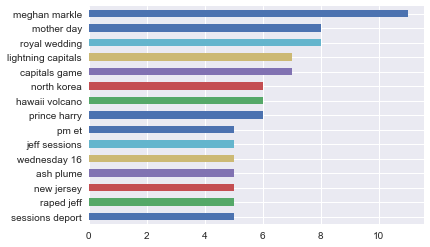

In [240]:
td[twos].sum().sort_values().tail(15).plot(kind='barh')

In [241]:
headlines.loc[headlines['headline'].str.contains('game')].values

array([["Cops used sex toy 'Big Blue' to harass co-workers, played game with genitals, lawsuit says",
        'fox'],
       ['Seattle Mariners star Robinson Cano suspended 80 games after positive test for banned substance',
        'fox'],
       ['Camera shakes as earthquake strikes during San Francisco Giants game',
        'fox'],
       ['First confirmed urban Ebola case is a ‘game changer’ in Congo outbreak',
        'wapo']], dtype=object)

In [244]:
headlines.loc[0]

headline    As China Plans Big Concessions on Trade, Some ...
pub                                                       nyt
Name: 0, dtype: object

In [248]:
headlines.loc[td['lightning capitals game'] > 0].headline.values

array(['Lightning-Capitals Game 4: Nicklas Backstrom might be back in the lineup',
       'Lightning-Capitals Game 4: Nicklas Backstrom is back for Washington',
       'Lightning-Capitals Game 4: Bolts surge ahead, 2-1, after Washington gets sloppy',
       'Lightning-Capitals Game 4: Washington power-play struggles, Steven Stamkos goal have Tampa up 2-1',
       'Lightning-Capitals Game 4: Alex Ovechkin helps Evgeny Kuznetsov tie it at 2',
       'Lightning-Capitals Game 4: Evgeny Kuznetsov ties it at 2 as Washington fires barrage at Tampa',
       'Lightning-Capitals Game 4: Washington kills key penalty, then yields key goal, trails 3-2'],
      dtype=object)

In [250]:
td['pub'] = headlines['pub']

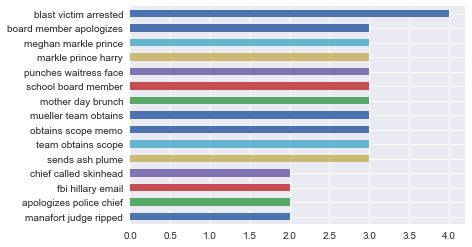

In [251]:
td.loc[td['pub'] == 'fox', threes].sum().sort_values().tail(15).plot(kind='barh')

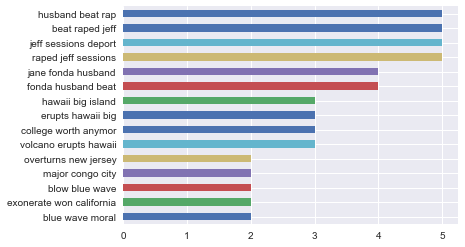

In [252]:
td.loc[td['pub'] == 'nyt', threes].sum().sort_values().tail(15).plot(kind='barh')

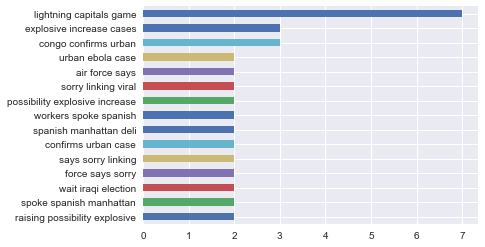

In [253]:
td.loc[td['pub'] == 'wapo', threes].sum().sort_values().tail(15).plot(kind='barh')

Should we narrow it down only to politics?

Need to stop stemming names

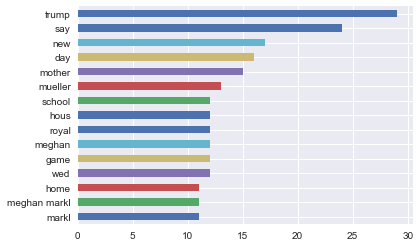

In [179]:
td.sum().sort_values().tail(15).plot(kind='barh')

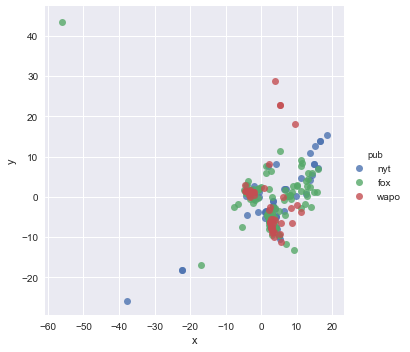

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler


iso = Isomap(n_components=2)
scaler = StandardScaler(with_mean=True, with_std=True)
coords = iso.fit_transform(scaler.fit_transform(td))

chartdata = pd.DataFrame(np.concatenate([coords, headlines['pub'].values.reshape((414,1))], axis=1), index=headlines.index)
chartdata.loc[:, 0] = chartdata[0].astype(float)
chartdata.loc[:, 1] = chartdata[1].astype(float)
chartdata.columns = ['x', 'y', 'pub']

ax = sns.lmplot(data=chartdata, x='x',y='y', fit_reg=False, hue='pub')
# ax.set(xlim=[-20,20], ylim=[-10,10])

In [165]:
headlines.loc[(chartdata['x'] < 0) & (chartdata['y'] < 2.5) & (chartdata['y'] > -5)].sample(10, random_state=42)['headline'].values

array(["Prince's Turks and Caicos estate heading to auction",
       'North Korea Threats Are ‘Splash of Cold Water’ Ahead of Talks',
       'Starbucks teams with patriotic bakery that trains injured veterans',
       '$800,000 Homes in Missouri, Georgia and Pennsylvania',
       "14-year-old hunter's encounter with bear cub goes viral",
       "'Cute puppy' brought into Illinois police station turns out to be coyote",
       'Senate defeats Rand Paul’s balanced-budget plan as he accuses GOP of ‘unholy alliance’ with Democrats on spending',
       'California man caught breakdancing on video after breaking into building, police say',
       'F.D.A. Names and Shames Drug Makers to Encourage Generic Competition',
       'US stock indexes edge lower in afternoon trading; oil rising'],
      dtype=object)

In [164]:
headlines.loc[chartdata['x'] > 0].sample(10, random_state=42)['headline'].values

array(['Pentagon releases video showing the recovery of a U.S. soldier’s remains in Niger',
       "Moving? Here's 5 things you can't take after selling your home",
       'Cops focus on teen boy previously caught with Pennsylvania teacher in steamed-up car in murder investigation',
       'A royal wedding can be a royal pain -- Here are some helpful ways to ‘negotiate’ your own wedding preparations',
       'Mike Slive, influential Southeastern Conference commissioner, dies at 77',
       'On the Market: Homes for Sale on the North Fork and Shelter Island',
       'Yanny or Laurel? Internet split on what name they hear in audio clip',
       'Manafort judge who ripped Special Counsel Mueller’s team obtains ‘scope’ memo',
       'Fears of Larger Contagion as Ebola Spreads to Major Congo City',
       'Pentagon releases video depicting recovery of U.S. soldiers’ remains in Niger'],
      dtype=object)

In [158]:
headlines.loc[chartdata['y'] < -40]['headline'].values

array(['Jane Fonda: Her Husband Beat and Raped Her. Jeff Sessions Might Deport Her. 6:07 PM ET'],
      dtype=object)

In [155]:
headlines.loc[chartdata['x'] > 60]

,headline,pub,len
index,,,
31,"‘I’m Here With You, Mate’",nyt,5


In [87]:
headlines['len'] = headlines['headline'].str.split().apply(len)

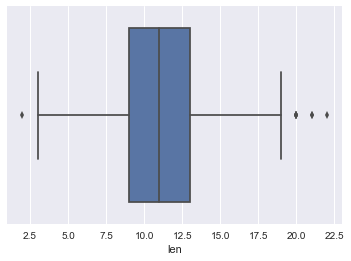

In [89]:
sns.boxplot(headlines['len'])

C:\Anaconda3\envs\media\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


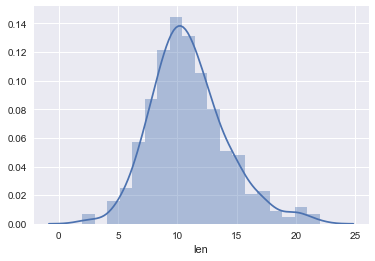

In [90]:
sns.distplot(headlines['len'])

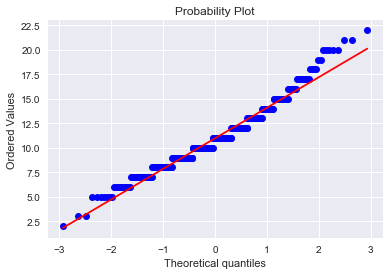

In [97]:
import scipy.stats as stats
stats.probplot(headlines['len'], dist="norm", plot=plt);

In [98]:
stats.normaltest(headlines['len'], axis=0, nan_policy='propagate')

NormaltestResult(statistic=28.13567629666528, pvalue=7.769901618795215e-07)

C:\Anaconda3\envs\media\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


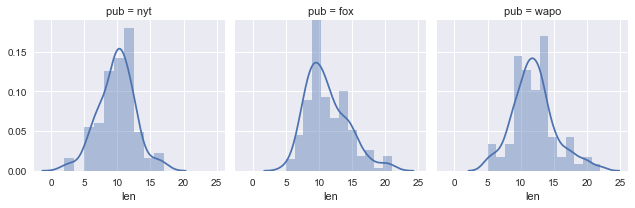

In [99]:
g = sns.FacetGrid(col='pub', data=headlines, sharex=True, sharey=True)
g.map(sns.distplot, 'len')

C:\Anaconda3\envs\media\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


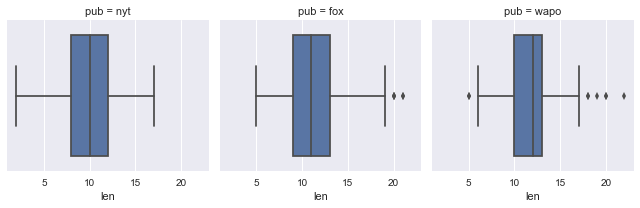

In [100]:
g = sns.FacetGrid(col='pub', data=headlines, sharex=True, sharey=True)
g.map(sns.boxplot, 'len')

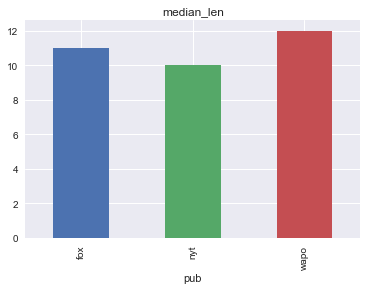

In [106]:
headlines.groupby('pub').median()['len'].plot(kind='bar', title='median_len')

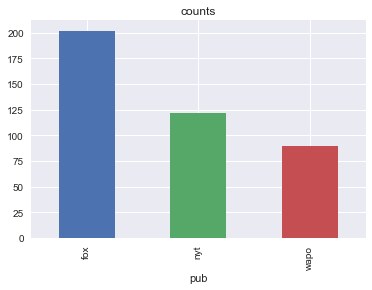

In [105]:
headlines.groupby('pub').count()['len'].plot(kind='bar', title='counts')

parts of speech

In [269]:
import nltk
def pos_tag(doc):
    tokenized = nltk.word_tokenize(doc)
    tagged = nltk.pos_tag(tokenized)
    pos = [x[1] for x in tagged]
    return pd.Series(pos).value_counts()

pos_counts = headlines['headline'].apply(pos_tag).fillna(0)
pos_counts.head()

,#,$,'',(,),",",.,:,CC,CD,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


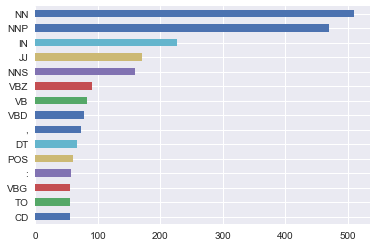

In [272]:
pos_counts.loc[headlines['pub']=='fox'].sum().sort_values().tail(15).plot(kind='barh')

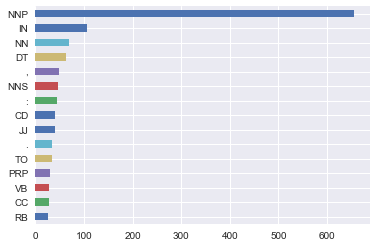

In [273]:
pos_counts.loc[headlines['pub']=='nyt'].sum().sort_values().tail(15).plot(kind='barh')

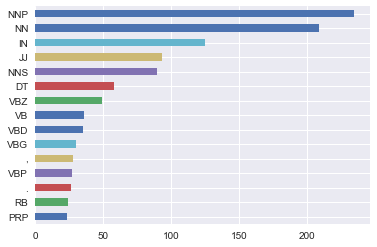

In [274]:
pos_counts.loc[headlines['pub']=='wapo'].sum().sort_values().tail(15).plot(kind='barh')

In [263]:
[x[1] for x in tagged]

['NN', ',', 'VBG', 'NN', 'IN', 'NN', 'IN', 'NN', ',', 'VBZ', 'JJ', 'NN', 'NN']

In [262]:
nltk.pos_tag?

Signature: nltk.pos_tag(tokens, tagset=None, lang='eng')
Docstring:
Use NLTK's currently recommended part of speech tagger to
tag the given list of tokens.

    >>> from nltk.tag import pos_tag
    >>> from nltk.tokenize import word_tokenize
    >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
    [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
    ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
    >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal')
    [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
    ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]

NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.

:param tokens: Sequence of tokens to be tagged
:type tokens: list(str)
:param tagset: the tagset to be used, e.g. universal, wsj, brown
:type tagset: str
:param lang: the ISO 639 code of the 